# Pseudo-random number generation and vectorization

## $ \S 1 $ Pseudo-random number generation

### $ 1.1 $ Introduction

__Pseudo-random__ numbers are generated by one of several algorithms in a
deterministic way. Since they are obtained according to mathematical formulas,
they are not truly random (hence "pseudo"), but these formulas are crafted in
such a way that the sequences of numbers that they generate exhibit the same
_statistical properties_ as true random numbers. In contrast, true __random
numbers__ must be generated through non-deterministic sources, such as the decay
of radioctive atoms or (more commonly in practice) electronic noise in hardware
circuits.

True randomness is essential in security for encryption and key generation,
where unpredictability is crucial, but by definition it cannot be encapsulated
as an algorithm. Despite these important differences, it is common to refer
to pseudo-random numbers simply as "random numbers", for brevity.

In NumPy, all functions that deal with random number generation are contained
within the `numpy.random` submodule. It provides a variety of methods to
generate pseudo-random numbers from different statistical distributions, perform
random shuffling, select random samples and more. 

All of the functions for generating random numbers considered below depend on an
initial value called the _seed_, which is used to compute not just a single
number but a whole sequence of them. To develop some intuition
about how these pseudo-random number generators work in general, let's consider
one basic mechanism for generating such a sequence.  We begin with a
mathematical function $ f $ having the following properties:
* $ f $ can be computed quickly.
* It spreads values evenly across the range of possible outputs.
* It is extremely sensitive to its input, meaning that small changes in $ x $
  may lead to large jumps in $ f(x) $.

After selecting such a function, we generate our pseudo-random number sequence
$ (x_n) $ as follows:

* $ x_0 $ is the initial value, called the __seed__. This seed must be specified
  manually, otherwise it will automatically be set by NumPy, perhaps based on
  the time in milliseconds since the beginning of the session.
* $ x_1 = f(x_0) $;
* $ x_2 = f(x_1) = (f \circ f)(x_0) $;
* $\  \vdots $
* $ x_n = f(x_{n - 1}) = \underbrace{(f \circ f \circ \cdots \circ f)}_{n}(x_0) $.
* $ \ \vdots $

In particular, if we know the seed and the function/algorithm, then we can easily
reobtain the same sequence of numbers. This is valuable for debugging and
simulations where reproducibility is a requirement. Here's how we can set the
seed for the random-number generator (__RNG__) in NumPy:

In [1]:
import numpy as np

np.random.seed(123)  # Set the seed. Use any number you like as argument
print(np.random.rand())  # Generates a pseudo-random real number between 0.0 and 1.0
print(np.random.rand())  # Generates a second pseudo-random number
print(np.random.rand())  # Generates a third pseudo-random number

0.6964691855978616
0.28613933495037946
0.2268514535642031


Note that _because the seed is reset everytime we rerun the code in this cell, 
the same sequence of numbers is generated everytime as well._

In [11]:
# Because the seed is _not_ being reset in the current cell, everytime we run
# the following line, a different pseudo-random number will be generated.
# Actually, this number is just the next term of the sequence whose first three
# terms were computed in the preceding cell. 
print(np.random.rand())

0.42310646012446096


📝 In Jupyter notebooks, once a seed has been set, its effect is _global_, i.e.,
it persists across other cells as long as the notebook kernel is running and has
not been restarted. If you need to work with an isolated seed, check the function
`np.random.RandomState`.

__Exercise:__ Can you predict what will happen if we do the following in a code cell?

0. restart the session;
1. generate a random number with `np.random.rand`;
2. set the seed;
3. rerun the code cell multiple times (i.e., perform steps 1 and 2 again and again)?

Check your guess by restarting the session and running the cell below.

In [15]:
print(np.random.rand())  # Generates a pseudo-random real number between 0.0 and 1.0
np.random.seed(123)  # Set the seed. Use any number you like as argument

0.6964691855978616


### $ 1.2 $ Generating pseudo-random numbers using NumPy

For simplicity, we'll initially focus on two main procedures:

* `random.rand` generates pseudo-random numbers from a __uniform distribution__ over $ [0, 1) $,
  meaning that the probability that the chosen number lies in an interval $ I \subset [0, 1) $
  equals the length of $ I $. 
* `random.randn` produces samples drawn from the
  __standard normal (Gaussian) distribution__ (having mean $ = 0 $, standard deviation
  $ =  1 $), whose graph is also known as the _bell curve_. It is extremely
  useful in statistics, probability, simulations and machine learning.

These are the two of the most fundamental probability distributions in statistics.

In [21]:
# Fill a 1D array having 6 coordinates with random numbers from the uniform distribution:
random_numbers = np.random.rand(6)
print(random_numbers)


[0.73799541 0.18249173 0.17545176 0.53155137 0.53182759 0.63440096]


Notice that the numbers
generated by a call to `randn` can range over all of $ \mathbb R $, although the probability
that a number $ x $ with $ \vert x \vert \ge c $ will be drawn decreases very rapidly as $ c $ grows.

In [24]:
# Generate a 2x3 array of random numbers from the standard normal distribution:
normal_numbers = np.random.randn(2, 3)
print(normal_numbers)

[[-2.75022426 -0.23415755 -0.69598118]
 [-1.77413406  2.36160126  0.03499308]]


__Exercise:__ Generate a sample of size $ N = 10, 100, \cdots, 10^6 $ drawn from the standard normal distribution.
In each case:

(a) Compute the sample mean and the sample standard deviation using the `mean`
and `stddev` methods and compare the results with those of the original
distribution.

(b) Count the proportion of elements in the sample that lie within the intervals
$ [-n, n] $ for $ n = 1,\,2,\,3 $. The expected proportions are approximately
$ 68.26\% $, $ 95.44\% $ and $ 99.72 \% $, respectively.


Here is a (non-random) sample of the main functions available in `numpy.random`.
For a complete list see the [NumPy documentation](https://numpy.org/doc/stable/reference/random/index.html):

| Function        | Description |
|-----------------|-------------|
| `rand(d0, d1, ..., dn)` | Array of uniformly random values in $ [0.0, 1.0) $, shape $ d_0 \times d_1 \times \cdots \times d_n $. |
| `uniform(lo=0.0, hi=1.0, size=None)` | Random samples from general continuous uniform distribution from `lo` to `hi`. |
| `randn(d0, d1, ..., dn)` | Random samples from the standard normal distribution with given shape. |
| `normal(mean=0.0, stddev=1.0, size=None)` | Random samples from a more general normal distribution. |
| `randint(lo, hi, size=None)` | Uniformly random integers from `lo` (inclusive) to `hi` (exclusive). |
| `binomial(n, p, size=None)` | Binomial distribution: $ P(X = k) = \binom{n}{k} p^k (1-p)^{n - k} $. |
| `choice(a, size=None, replace=True, p=None)` | Random sample drawn among elements of a given $ 1D $ array. |
| `permutation(A)` | Permutation (copy) of array $ A $ along its $ 0 $-th axis or of $ (0, 1, \cdots, n - 1) $ if $ A = n $. |
| `shuffle(A)` | Shuffle an array _in-place_ along its $ 0 $-th axis. |


Informally, there are two kinds of probability distributions (see $ \S 4 $ for more details):
* __Discrete distributions__ assign probabilities to a finite or denumerable set of outcomes. (A _denumerable_ set is one for which there exists a one-to-one correspondence with $ \mathbb N $). Of the list above, `randint`, `binomial`, `choice`, `permutation` and `shuffle` implement discrete (in fact, finite) distributions.
* __Continuous distributions__ assign probabilities to ranges of outcomes by
  integration of a continuous density function over these ranges. Since the set
  of possible outcomes is uncountably infinite (usually a subset of
  $ \mathbb R $), the probability of any single event is always $ 0 $. The
  normal distribution is the most important continuous distribution. The
  simplest one is the continuous uniform distribution modeled by `uniform`.

📝 Python has a built-in module `random` that also implements pseudo-random
number generators for the most common probability distributions. However,
it can only generate one random number at a time, so NumPy's Random submodule is
much more efficient for generating large samples.

__Exercise:__ Write a Python function using NumPy to simulate the rolling of a
six-sided die $ N $ times. Plot the frequency of each outcome for $ N = 600 $,
using the code fragment below (more about Matplotlib in a later notebook!).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Implement the following function:
def roll_dice(N):
    # ...
    # ...

# The following function will allow you to plot the histogram:
def plot_histogram(N):
    results = roll_dice(N)
    plt.hist(results, bins=np.arange(1, 8) - 0.5, edgecolor="black")
    plt.xlabel("Face")
    plt.ylabel("Frequency")
    plt.title("Frequency of dice rolls")
    plt.xticks(np.arange(1, 7))
    plt.show()


__Exercise:__ Generate a shuffled deck of cards (represented as the numbers $ 1
$ to $ 52 $) and draw the top $ 5 $ cards after shuffling.

In [ ]:
def shuffle_deck():
    suits = ["C", "D", "H", "S"]
    ranks = [f"{i}" for i in range(2, 11)] + ["J", "Q", "K", "A"] 
    cards = [rank + suit for rank in ranks for suit in suits]


print(shuffle_deck())

__Exercise:__ Create a simple random password generator using the `randint` procedure and the `chr` function, which converts integers into characters according to the [ASCII table](https://en.wikipedia.org/wiki/ASCII#Printable_characters).


__Exercise:__ Consider a sequence of $ N $ __Bernoulli trials__ where at each
trial we flip a biased coin with $ P(\text{heads}) = p $ and $ P(\text{tails}) =
q = 1 - p $ for a given $ p \in [0, 1] $.

(a) Use `np.random.binomial` to write a function `flip(N, p)` that returns the results in
the form of an array, with $ 1 $ representing heads and $ 0 $ representing tails.

(b) For $ N = 10^k\ (k = 1, 2, \cdots, 6) $, compute the mean and standard
deviation of the resulting samples and compare them to the distribution
mean and standard deviation $ Np $ and $ \sqrt{Npq} $, respectively.

(c) Use the provided utility to plot the distribution of the number of heads
obtained in these trials.

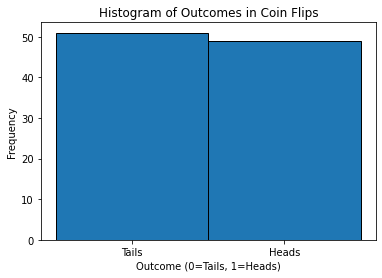

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def flip(p, N):
    # Implement this function using `np.random.binomial`

def simulate_coin_flips(p, N):
    results = flip(p, N)
    plt.hist(results, bins=np.arange(-0.5, 2.5), edgecolor="black", align="mid")
    plt.xlabel("Outcome (0=Tails, 1=Heads)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Outcomes in Coin Flips")
    plt.xticks([0, 1], ['Tails', 'Heads'])
    plt.show()

simulate_coin_flips(0.5, 100)


### $ 1.3 $ The Monte Carlo method

The **Monte Carlo method** refers to a class of algorithms that involve executing a large number $N$ of *experiments* or *trials* and analyzing the statistical results to obtain numerical conclusions. It is widely used in Physics, Chemistry, Engineering, and other fields. The best way to understand it is through some examples.


**Example (estimating $ \pi $ by throwing darts):** Consider a person who throws darts at a target that has the shape of the disk $ D $ in $ \mathbb R^2 $ with radius $ 1 $ and center at the origin, described by the inequality
$$
x^2 + y^2 \le 1\,.
$$
This disk has area $ \pi $ and is contained within the square $ S $ of area $ 4 $ determined by
$$
\lvert{x}\rvert \le 1\,, \quad \lvert{y}\rvert \le 1\,.
$$
Assume that the person is competent enough to always hit the square, but apart from this, the darts are thrown at random. The probability that a point chosen uniformly at random in $ S $ is within the disk $ D $ is the quotient of the areas, 
$$
\frac{\text{area}(D)}{\text{area}(S)} = \frac{\pi}{4}\,.
$$

Suppose we randomly choose $ 1, 2, 3, \dots $ up to a total of $ N $ points inside $ S $, and let $ n $ be the number of these points that belong to the disk $ D $. A theorem from Probability Theory called the **Law of Large Numbers** implies that the quotient between the number of "successes" $ n $ and the total number $ N $ of points in the sample will almost surely converge toward the probability of success:
$$
\lim_{N \to \infty} \frac{n}{N} = \frac{\pi}{4}\,.
$$
More precisely, given any positive $ \varepsilon > 0 $,
$$
\lim_{N \to \infty} \text{pr}\bigg(\Big\lvert \frac{n}{N} - \frac{\pi}{4}\Big\rvert \le  \varepsilon \bigg) = 1\,.
$$
In words, the probability that the ratio between the number of points inside the disk ($ n $) and the total number of points ($ N $) differs from $ \pi/4 $ by more than $ \varepsilon $ *tends to zero* as the number of experiments increases! Therefore, we can obtain an estimate for $ \pi $ using the computer to simulate a large number $ N $ of trials and calculating the corresponding quotient $4n/N $.

The implementation in code of the generic Monte Carlo method is quite simple:

In [11]:
def monte_carlo(trial, N):
    """
    Given a `trial` function that simulates a single experiment, to be
    implemented separately by the user, and the number N of experiments
    to be conducted, we count the number n of successes and return n / N.
    `trial` should be a function without arguments that returns True or False.
    """
    n = 0
    for _ in range(N):
        if trial():
            n += 1
            
    return n / N

__Exercise:__ Use the ideas from the previous example to calculate $ \pi $ as follows:

(a) Create a procedure `belongs_to_disk` (without parameters) that simulates the
experiment described in the example, i.e., it generates two random numbers $ x
$ and $ y $ between $ [-1, 1] $ and returns `True` if and only if $ x^2 + y^2 \le 1
$.

(b) Use the Monte Carlo method and your experiment to obtain an approximation
for the value of $ \pi $ accurate to the second decimal place.


__Exercise:__ A theorem by E. Cesàro (1850—1906) states that the probability that two randomly chosen natural numbers are relatively prime is $ \frac{6}{\pi^2} $. (Two integers $ m $ and $ n $ are *relatively prime* if $ \text{gcd}(m, n) = 1 $.)

(a) Construct a trial that randomly chooses two natural numbers between one and one million ($ 10^6 $) and returns `True` if they are relatively prime or `False` otherwise.

(b) Use the Monte Carlo method and the Cesàro theorem to obtain an approximation for $ \pi $.


In [20]:
# (a):
from numpy import sqrt, pi
from numpy.random import randint


def gcd(a, b):
    """Returns the greatest common divisor of two integers a, b."""
    assert isinstance(a, int) and isinstance(b, int)
    if b == 0:
        return a
    else:
        return gcd(b, a % b)
    
    
# (b):


## $ \S 2 $ Vectorization


Suppose that we have vectors $ \mathbf u $ and $ \mathbf v $ in $ \mathbb R^3 $
and would like to take their inner (dot) product. Here's the most obvious way of doing
this in Python:

In [ ]:
import numpy as np

dimension = 3
u = np.array([1, 2, 3])
v = np.array([-1, 0, 1])

product = 0
for i in range(dimension):
    product += u[i] * v[i]
print(product)

2


This approach's limitation is that it performs the required arithmetical
operations *in sequence*. That is, we first compute the product $ 1 \cdot (-1) $
and add it to our cumulative total; then we add $ 2 \cdot 0 $; and finally we add
$ 3 \cdot 1 $ to arrive at the result.

We can speed up computations of this kind significantly by _processing the
entire arrays, or at least large chunks of the arrays, at once_. This technique
is called **vectorization**. It leverages the optimized implementations of vector and
matrix operations provided by libraries such as NumPy, which make use of
multi-core CPUs or even GPUs (Graphics Processing Units) to execute tasks *in
parallel* whenever possible. 

The vectorized version of the previous example would be:

In [5]:
import numpy as np

u = np.array([1, 2, 3])
v = np.array([-1, 0, 1])

product = np.dot(u, v)  # Compute the dot product of u and v.
print(product)

2


This version is certainly more concise and legible. However, because the vectors
have only $ 3 $ dimensions, the performance boost is not noticeable. To better
appreciate the power of vectorization, let's consider the task of computing
the dot product of two vectors in $ \mathbb R^{10^7} $, that is, having $ 10 $
million coordinates. Here is the vectorized version:

In [23]:
import time  # Module that will allow us to time the computations

# Generate two large vectors with random coordinates in [0, 1):
dimension = 10**7
u = np.random.rand(dimension)  
v = np.random.rand(dimension)

tic = time.time()
prod = np.dot(u, v)
toc = time.time()
vect_runtime = toc - tic

print(f"The inner product is {prod}.")
print(f"Runtime for vectorized version: {1000 * vect_runtime} ms.")

The inner product is 2499817.2559623905.
Runtime for vectorized version: 5.790948867797852 ms.


📝 The function `time.time()` used above returns a floating point number that
represents the time in seconds since January 1st, 1970, 00:00:00 (UTC). The
duration of the computation was measured by taking the time before (`tic`) and
after (`toc`) it, and then taking the difference. 

Considering the number of coordinates of the vectors, the computation is pretty
fast. Let's now contrast the performance to that of its non-vectorized
counterpart.

In [21]:
import time  # A module that will allow us to time the computations

tic = time.time()
prod = 0
for i in range(dimension):
    prod += u[i] * v[i]
toc = time.time()
non_vect_runtime = toc - tic
print(f"The inner product is {prod}.")
print(f"Runtime for vectorized version: {non_vect_runtime} s.")
print(f"Or, in miliseconds: {1000 * (non_vect_runtime)}")

The inner product is 2500378.5121053886.
Runtime for vectorized version: 1.5147225856781006 s.
Or, in miliseconds: 1514.7225856781006


📝 The slight discrepancy in the value of the dot product between the two
versions arises because the way that the rounding errors propagate through the
calculations could differ, since the the operations are grouped differently.

**Exercise:** Referring to the example above, compute the precise 
speedup factor relating the two implementations. Why does this value
change everytime you compute it?

__Exercise:__ Apply the same method to compare the time it takes to generate $ 1 $
million uniformly random numbers in $ [0, 1.0) $ using:

(a) A list comprehension.

(b) A for loop.

(c) Vectorization.

This discussion shows that vectorization provides a simple way to improve the
performance of our code by several orders of magnitude. This is especially
crucial in machine learning and computer graphics, since these fields frequently
involve dealing with vast datasets and complex numerical computations. In such
cases, code that does not make use of vectorization is simply not viable.

To summarize: *When performing operations on arrays, avoid loops whenever
possible; instead, use the built-in vectorized implementations provided by
NumPy.*

## $ \S 3 $ Universal functions

To illustrate another aspect of vectorization, let $ \mathbf u = (1, 2, 3) $ and
suppose that we need to apply the exponential function to each of the
coordinates of $ \mathbf u $. That is, suppose that we wish to compute $ \exp(u)
= (e^1, e^2, e^3) $. We could simply use a for-loop:

In [3]:
u = np.array([1, 2, 3])
v = np.zeros(3)  # will hold the result
for i in range(3):
    v[i] = np.exp(u[i])
print(v)

[ 2.71828183  7.3890561  20.08553692]


However, there is an alternative way that is both simpler and more efficient,
namely, to use vectorization, in this case by leveraging to NumPy to apply the
exponential to the vector $ \mathbf u $ as a whole:

In [4]:
v = np.exp(u)
print(v)

[ 2.71828183  7.3890561  20.08553692]


A __universal function__ (or __ufunc__) is a function that operates element-wise
and efficienttly on arrays.  The example below illustrates how scalar functions
are automatically treated as universal functions when applied to arrays.  This
approach also works with basic operations that are built into Python, such as:

In [5]:
squared_u = u**2
print(squared_u)

[1 4 9]


In [6]:
reciprocal_u = 1 / u
print(reciprocal_u)

[1.         0.5        0.33333333]


Any built-in universal function returns a new array, but admits an optional `out=<array>` argument
that specifies on which array this result is to be stored. This is usually applied to modify the
original array in place.

In [16]:
a = np.array([1.0, 2.0, 3.0, 4.0])
print(a)  # Original array a

# Compute sin(x * pi / 4) for each x in a, in-place:
np.sin(a * np.pi / 4, out=a)  
print(np.round(a, 2))

[1. 2. 3. 4.]
[0.71 1.   0.71 0.  ]


__Exercise:__ Similarly to what we did for the inner product, compare the difference in performance
between the vectorized and non-vectorized approaches to computing $ e^u $, where $ u $ is a random
vector having a large number of dimensions. What is the speedup factor, approximately?

__Exercise:__ Let $ \mathbf u = (1, 2, 3) $. Compute:

(a) $ \log(\mathbf u) $ (that is, the vector whose coordinates are the logarithms of the coordinates of $ \mathbf u $). *Hint*: Use the `np.log` function.

(b) $ \vert{\mathbf u}\vert $ (that is, the vector whose coordinates are the absolute values of the coordinates of $ \mathbf u $). *Hint:* Use the `np.abs` function.

(c) $ \max\{\mathbf u, 3\} $. *Hint:* Use the `np.maximum` function.

(d) $ \sin\big(\tfrac{\pi \mathbf u}{2}\big) $. *Hint:* Use the `np.sin` function.

We can also define our own universal functions. If a function $ f $ is built
from other, previously defined universal functions, then it will automatically
inherit some of the properties of universal functions. In particular, it is
applied element-wise when called on an array. However, it will not be
as highly optimized as built-in ufuncs.

In [7]:
f = lambda x: x**2 - x - 1
print(f(u))

[-1  1  5]


Here is a list of some of the mathematical built-in ufuncs.

| Category                         | Functions | Description |
|----------------------------------|---------------------------------------------------------------------|-------------|
| Arithmetic operations         | `add`, `subtract`, `multiply`, `divide`, `power` | Prefix (and element-wise) versions of the basic arithmetic infix operators `+`, `-`, `*`, `/` and `**`. |
| Absolute value | `abs` | Absolute value of integers and floating-point numbers; modulus of complex numbers. |
| Exponents and logarithms         | `exp`, `exp2`; `log`, `log2`, `log10`; `expm1`, `log1p`             | Exponential and logarithmic functions, including bases $ 2 $ and $ 10 $. `expm1` calculates $ e^x - 1 $ for accuracy with small $ x $. `log1p` calculates $ \log(1 + x) $. |
| Powers and roots                 | `power`, `sqrt`, `cbrt`, `square`                                   | Raise elements to powers, compute square roots, cube roots, and squares. |
| Division and remainder | `divide`, `floor_divide`; `mod` (or `remainder`); `fmod`, `divmod` | True division, floor division, modulo, and remainder. `fmod` handles floating-point remainders. `divmod` returns quotient and remainder. |
| Trigonometric | `sin`, `cos`, `tan`; `arcsin`, `arccos`, `arctan`, `arctan2`        | Sine, cosine, and tangent of a given angle (in radians) and their inverses. `arctan2` calculates the angle that a vector in $ \mathbb R^2 $ determines with the positive $ x $-axis.
| Hyperbolic trigonometric | `sinh`, `cosh`, `tanh`; `arcsinh`, `arccosh`, `arctanh`             | Hyperbolic sine, cosine, and tangent functions and their inverses. |
| Rounding | `round`, `rint`; `ceil`, `floor`; `trunc`              | Round to given precision, round to nearest integer, ceiling and floor functions, truncation. |
| Finite/infinite checker | `isfinite`, `isinf`, `isnan` | Check for finite, infinite and NaN (__Not A Number__). |
| Minimum and maximum | `minimum`, `maximim`; `fmin`, `fmax` | Element-wise min/max of two arrays. `fmin` and `fmax` ignore NaNs. |
| Bit-twiddling | `bitwise_and`, `bitwise_or`, `bitwise_xor`, `bitwise_not` | Perform bitwise AND, OR, XOR, and NOT operations, respectively. |

This automatic extension of scalar-valued functions to arrays also applies to the comparison operators `==`, `!=`, `>`, `>=`, `<`, `<=`.
In particular, note that if $ A $ and $ B $ are arrays of the same shape, then
`A == B` returns a boolean array of the same shape obtained by comparing the
elements of $ A $ and $ B $ element-wise for equality. 

In [6]:
a = np.ones(5)  # [1 1 1 1 1]
b = np.array([1, 0, 1, 0, 1])

# Vectorized equality comparison:
result = a == b

print(result)

[ True False  True False  True]


📝 To decide whether $ A $ and $ B $ themselves are equal, one should instead use
the `np.array_equal` function.

In [16]:
A = np.ones((3, 4))  # [1 1 1 1 1]
B = np.ones((3, 4))
C = np.copy(B)
C[0, 0] = 0

print(f"Array A:\n{A}\n")
print(f"Array B:\n{B}\n")
print(f"Array C:\n{C}\n")

print(np.array_equal(A, B))
print(np.array_equal(A, C))

Array A:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array B:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array C:
[[0. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

True
False


We can also compare every element of an array to a given number, or even combine
two or more comparisons with the boolean operators `~` (__negation__), `&`
(__and__), `|` (__or__), `^` (__xor__ or __exclusive or__):

In [24]:
a = np.array([10, 20, 30, 40, 50])

# Vectorized comparison to check if elements are greater than 25 and less than 45:
filter = (a > 25) & (a < 45)

print(filter)

[False False  True  True False]


If want, we can then use this boolean array as a filter to extract its elements for which
the condition it was filtered on is true. More generally, the technique of using a boolean
array $ F $ to select elements from an array $ A $ is called __boolean
indexing__. Here $ A $ and $ F $ must have the same shape, and the syntax is `A[F]`:

In [25]:
print(a[filter])

[30 40]


__Exercise:__ Perform the following tasks using vectorized comparison operations
involving the array $ A $ given below, then extract the elements satisfying the
stated conditions by boolean indexing:

(a) Determine which elements have absolute value greater than $ 15 $.

(b) Determine which elements are odd and less than or equal to $ 11 $.

(c) Determine which elements are greater than $ 30 $ or less than $ -10 $.

In [22]:
np.random.seed(123)
A = np.random.randint(-50, 50, size=(4, 4))
print(A)

[[ 16  42  48 -33]
 [ 33   7  36  47]
 [ 46  -3  23 -18]
 [ -4  46 -25  33]]


## $ \S 4 $ Appendix: basic terminology of probability theory

In this appendix we very briefly explain some of the main terms from probability
theory that are necessary to grasp what is going on behind the scenes when we
call one of the random-number generating functions in NumPy.

### $ 4.1 $ A simple example

Consider an experiment which consists of rolling a six-faced die. The set
of all possible _outcomes_ is given by $ \Omega = \{1, 2, \cdots, 6\} $.  This
is our _sample space_ in this case. An _event_, such as rolling an even number,
is simply a subset of $ \Omega $, in this case $ E = \{2, 4, 6\} $. Another
event would be rolling a face greater than $ 4 $, described by $ A = \{5, 6\} $.

If the die is perfectly balanced, so that each outcome is equally likely, then
the _probability distribution_ on our sample space is the function $ f \colon
\Omega \to [0, 1] $ that assigns the value $ \frac{1}{6} $ to each face.
Actually, this is a very special distribution called the _uniform distribution_.
In practice, the die will never be perfectly balanced, so that some
outcomes (faces) may be more probable than others. It is the purpose of the
probability distribution to describe how probabilities are allocated among the
possible outcomes.

The preceding example illustrates a _finite_ sample space. However, many
interesting phenomena, such as measuring the luminosity of a star or the
height of an individual, are more adequately modeled by continuous sample spaces.
In such cases, the probability of any single outcome is zero. The probability
of an event $ A $ is obtained by _integrating_ the probability distribution over
$ A $.  The formal definitions below will cover both cases.

### ⚡ $ 4.2 $ Formal definitions

Let $ \Omega $ be an arbitrary set, not necessarily finite. An
element of $ \Omega $ will be called an __outcome__ (or __elementary event__),
and a subset of $ \Omega $ will be called an __event__.  A __probability
function__ $ P $ on $ \Omega $ is a real function defined on the set of events
of $ \Omega $ that satisfies the following three properties, called the
__Kolmogorov axioms__:

1. (_Non-negativity_) For any event $ A $ in the sample space $ \Omega $, the
probability of $ A $ is non-negative; in symbols, $ P(A) \ge 0 $.

2. (_Unit Measure_) The probability of the entire sample space is 1, that is,
$ P(\Omega) = 1 $. This axiom implies that the probability that some outcome in
the sample space will occur is certain.

3. (_Countable Additivity_) For any countable or finite sequence of mutually
exclusive events $ A_1, A_2, A_3, \ldots $ (meaning no two events have any
outcomes in common), the probability of the union of these events is equal to
the sum of their individual probabilities. Symbolically, if $A_i \cap A_j =
\emptyset$ whenever $i \neq j$, then
$$ P\left(\bigcup_{k=1}^{\infty} A_k\right) = \sum_{k=1}^{\infty} P(A_k)\,. $$

Formally, a __sample space__ is a pair consisting of a set $ \Omega $ and
a probability function $ P $ as above.

⚠️ Actually, our definition is not entirely correct because in the case where $
\Omega $ is not discrete, it may not be possible to define $ P $ consistently
over the set of _all_ subsets of $ \Omega $. In other words, there may be some
subsets of $ \Omega $ which are not considered events. Because of this, we only
require that $ P $ be defined over a so-called *$ \sigma $-algebra*, but we will
ignore these technical difficulties here.

Usually a sample space is described not in terms of the probability function
$ P $ above, which is defined on a set of subsets of $ \Omega $, but in terms
of a simpler function $ f $ defined over $ \Omega $ itself, called a
__probability distribution__, as discussed below.

A __discrete__ sample space is one whose underlying set $ \Omega $ of outcomes
is either countably infinite or finite. In other words, $ \Omega $ must be in
one-to-one correspondence with the set of natural numbers or with one of its
finite subsets. In this case, $ P $ is completely determined by a suitable
assignment of probabilities to each of the outcomes by means of the
distribution function $ f \colon \Omega \to [0, 1] $. In this context, $ f $ is
also called a __probability mass function__ (or __pmf__).  The only condition
that it must satisfy is that
$$
\sum_{x \in \Omega} f(x) = 1\,.
$$
Then for an arbitrary event $ A $, we define
$$
P(A) := \sum_{x \in A} f(x)\qquad (A \subset \Omega)\,.
$$
Note that when $ A $ isn't finite, this is a series, not a finite sum, but its
terms are all nonnegative and it is bounded above by the total probability $
\sum_{x \in \Omega} f(x) = P(\Omega) = 1 $. Hence this series has a finite
sum for any $ A \subset \Omega $. It is easily checked that this $ P $
satisfies all three required axioms.

For an uncountable sample space $ \Omega \subset \mathbb R^n $, we are still 
able to describe the probability of events $ A \subset \Omega $ in terms of a
simpler function, the distribution function $ f \colon \Omega \to [0, +\infty) $.
However, this time we _integrate_ $ f $ over $ A $ instead of summing it:
$$
P(A) := \int_A f(x)\,dx \qquad (A \subset \Omega)\,.
$$
In this context $ f $ is also called a __probability density function__ (or
__pdf__). The only restriction besides nonnegativity is that
$$
P(\Omega) = \int_{\Omega}f(x)\,dx\, = 1\,.
$$
In practice we almost always assume that $ f $ is continuous, so that the
integrals above exist for any reasonable event $ A $ of $ \Omega $. A sample
space $ \Omega $ together with such a continuous probability distribution $ f $
is referred to as a __continuous__ sample space.